In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv of matches from 538.com
data = pd.read_csv('spi_matches_latest.csv')

In [5]:
#Grab data from Premier League 2021-22 season
df = data[(data.league == 'Barclays Premier League') & (data.season == 2021)]

In [8]:
#Create teams list
teams = list(df.team1.unique())
teams.sort()

In [9]:
#Create definitions to grab score of indicated team and opposition
def grab_scores(team, x):
    team_score = None
    opp_score = None
    #See if the indicated team is team1 or team2 (home or away), assign scores accordingly
    if team in df.loc[x].team1:
        team_score = df.loc[x].score1
        opp_score = df.loc[x].score2
    elif team in df.loc[x].team2:
        team_score = df.loc[x].score2
        opp_score = df.loc[x].score1
    else:
        pass
    return team_score, opp_score

#From a tuple of scores (team and opponent scores from the above definition), return the result for the indicated team
def win_loss_draw(scores):
    t_score = scores[0]
    o_score = scores[1]
    #If score is not a float value, either the team isn't the correct team, or the game hasn't happened yet
    if isinstance(t_score, float) == False:
        return None
    if t_score > o_score:
        return 3
    if t_score == o_score:
        return 1
    if t_score < o_score:
        return 0
    
#If the created list of results for a team is less than 38 (number of games in a season), fill out the rest of the season with nan
def fill_out_list(points_list):
    while len(points_list) < 38:
        points_list.append(np.nan)
    return points_list

In [10]:
#Create empty points table
points_table = pd.DataFrame(columns = teams)
#Iterate through teams
for team in teams:
    #For each game in the dataframe, grab the result of the game for the indicated team, creating a list of results
    points_list = [win_loss_draw(grab_scores(team,x)) for x in df.index]
    #Remove Null values (Games that the indicated team didn't play, or haven't played yet)
    points_list = [e for e in points_list if isinstance(e, int)]
    #Fill out rest of schedule with nan
    points_list = fill_out_list(points_list)
    #Add list to dataframe, adding 0 as the starting table value
    points_table[team] = [0.0] + points_list

In [11]:
#Cummulate the values of each row, creating a dataframe representing the point tally of each team every matchday
cum_points_table = points_table.cumsum(axis = 0)

In [43]:
#Main colors of each team, in hash form
team_colors_dict = {'Manchester City': '#6CABDD',
 'Liverpool': '#C8102E',
 'Chelsea': '#034694',
 'Tottenham Hotspur': '#132257',
 'Arsenal': '#EF0107',
 'Manchester United': '#DA291C',
 'West Ham United': '#7A263A',
 'Wolverhampton': '#FDB913',
 'Leicester City': '#003090',
 'Brighton and Hove Albion': '#0057B8',
 'Brentford': 'red',
 'Newcastle': 'black',
 'Crystal Palace': '#1B458F',
 'Aston Villa': '#95BFE5',
 'Southampton': '#D71920',
 'Burnley': '#003399',
 'Everton': '#fbe304',
 'Leeds United': '#6C1D45',
 'Watford': '#f11a1a',
 'Norwich City': '#00a74c'}

In [34]:
#Sorting table with current table standings
cum_points_table =  cum_points_table[['Manchester City', 'Liverpool', 'Chelsea', 'Tottenham Hotspur', 'Arsenal',
       'Manchester United', 'West Ham United', 'Wolverhampton', 'Leicester City',
       'Brighton and Hove Albion', 'Brentford', 'Newcastle', 'Crystal Palace', 'Aston Villa', 'Southampton', 'Burnley',
       'Everton', 'Leeds United', 'Watford', 'Norwich City']]
cum_points_table

,Manchester City,Liverpool,Chelsea,Tottenham Hotspur,Arsenal,Manchester United,West Ham United,Wolverhampton,Leicester City,Brighton and Hove Albion,Brentford,Newcastle,Crystal Palace,Aston Villa,Southampton,Burnley,Everton,Leeds United,Watford,Norwich City
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
2,3.0,6.0,6.0,6.0,0.0,4.0,6.0,0.0,3.0,6.0,4.0,0.0,1.0,3.0,1.0,0.0,4.0,1.0,3.0,0.0
3,6.0,7.0,7.0,9.0,0.0,7.0,7.0,0.0,6.0,6.0,5.0,1.0,2.0,4.0,2.0,1.0,7.0,2.0,3.0,0.0
4,9.0,10.0,10.0,9.0,3.0,10.0,8.0,3.0,6.0,9.0,5.0,1.0,5.0,4.0,3.0,1.0,10.0,2.0,3.0,0.0
5,10.0,13.0,13.0,9.0,6.0,13.0,8.0,3.0,6.0,12.0,8.0,2.0,5.0,7.0,4.0,1.0,10.0,3.0,6.0,0.0
6,13.0,14.0,13.0,9.0,9.0,13.0,11.0,6.0,7.0,13.0,9.0,3.0,6.0,10.0,4.0,2.0,13.0,3.0,7.0,0.0
7,14.0,15.0,16.0,12.0,10.0,14.0,11.0,9.0,8.0,14.0,12.0,3.0,7.0,10.0,4.0,3.0,14.0,6.0,7.0,1.0
8,17.0,18.0,19.0,15.0,11.0,14.0,14.0,12.0,11.0,15.0,12.0,3.0,8.0,10.0,7.0,3.0,14.0,6.0,7.0,2.0
9,20.0,21.0,22.0,15.0,14.0,14.0,17.0,13.0,14.0,15.0,12.0,4.0,9.0,10.0,8.0,4.0,14.0,7.0,10.0,2.0


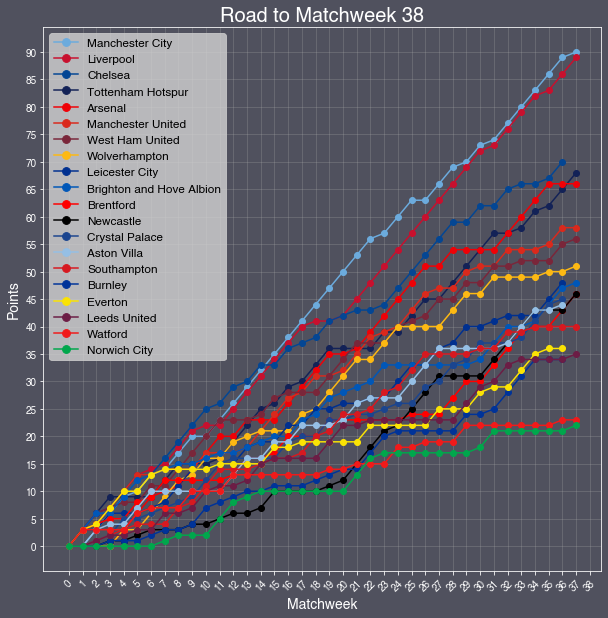

In [48]:
#Formatting (Font, background color, tick color, axes color and sizes)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='white'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='white'
plt.rcParams['ytick.color']='white'
plt.rcParams['axes.facecolor']='#50515e'
plt.rcParams['savefig.facecolor']='#50515e'

#Actual Plot
fig, ax = plt.subplots(figsize=(10, 10), facecolor = '#50515e')

#For each team, plot a line graph, using the color dict to map the colors
for team in cum_points_table.columns:
    plt.plot(cum_points_table.index, cum_points_table[team], marker='o', color = team_colors_dict[team])

#yticks every 5 points
plt.yticks(range(0, 92, 5), range(0, 92, 5))
#Adjust the xticks to show each week, rotate values
plt.xticks(range(0, 39), range(0, 39), rotation = 45)

#Legend
plt.gca().legend((cum_points_table.columns), fontsize=11.8, markerscale = 1.3, loc = 'upper left', facecolor = 'lightgrey')

#Titles, labels
plt.title('Road to Matchweek 38', fontsize=20, color = 'white')
plt.xlabel('Matchweek', fontsize=14, color = 'white')
plt.ylabel('Points', fontsize=14, color = 'white')
plt.grid(True, alpha = .3)

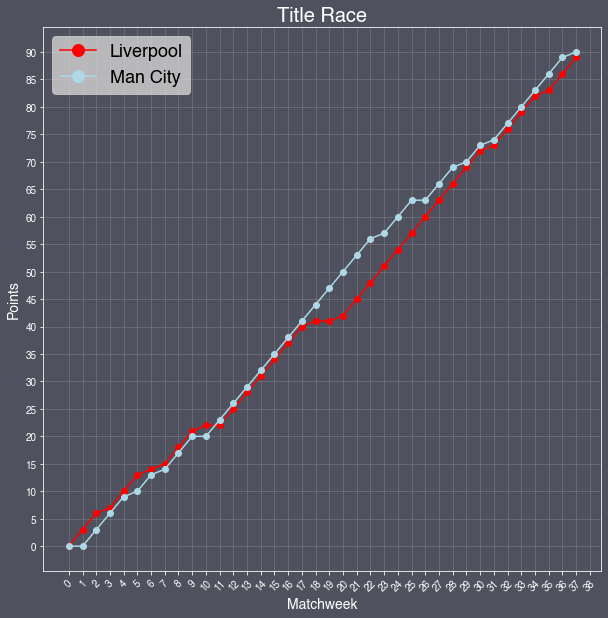

In [47]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor = '#50515e')

#Plot Liverpool and Man City
liv = plt.plot(cum_points_table.index, cum_points_table['Liverpool'], color='red', marker='o')
man = plt.plot(cum_points_table.index, cum_points_table['Manchester City'], color='lightblue', marker='o')

#yticks every 5 points
plt.yticks(range(0, 92, 5), range(0, 92, 5))
#Adjust the xticks to show each week, rotate values
plt.xticks(range(0, 39), range(0, 39), rotation = 45)

#Legend
plt.gca().legend(('Liverpool','Man City'), fontsize=18, markerscale = 2, facecolor = 'lightgrey')

#Titles, labels
plt.title('Title Race', fontsize=20, color = 'white')
plt.xlabel('Matchweek', fontsize=14, color = 'white')
plt.ylabel('Points', fontsize=14, color = 'white')
plt.grid(True, alpha = .3)
#plt.savefig('title_race.jpg')

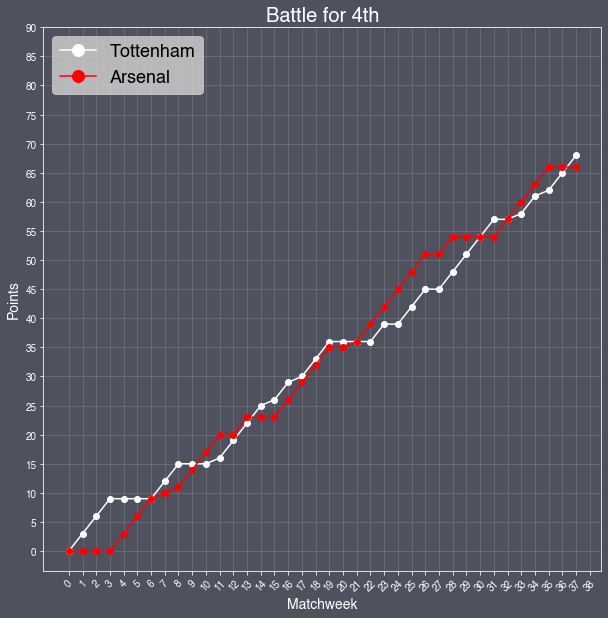

In [51]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor = '#50515e')

#Plot Tottenham and Arsenal
plt.plot(cum_points_table.index, cum_points_table['Tottenham Hotspur'], color='white', marker='o')
plt.plot(cum_points_table.index, cum_points_table['Arsenal'], color='red', marker='o')

#yticks every 5 points
plt.yticks(range(0, 92, 5), range(0, 92, 5))
#Adjust the xticks to show each week, rotate values
plt.xticks(range(0, 39), range(0, 39), rotation = 45)

#Legend
plt.gca().legend(('Tottenham','Arsenal'), fontsize=18, markerscale = 2, facecolor = 'lightgrey', loc = 'upper left')

#Titles, labels
plt.title('Battle for 4th', fontsize=20, color = 'white')
plt.xlabel('Matchweek', fontsize=14, color = 'white')
plt.ylabel('Points', fontsize=14, color = 'white')
plt.grid(True, alpha = .3)
#plt.savefig('battle_for_4th.jpg')

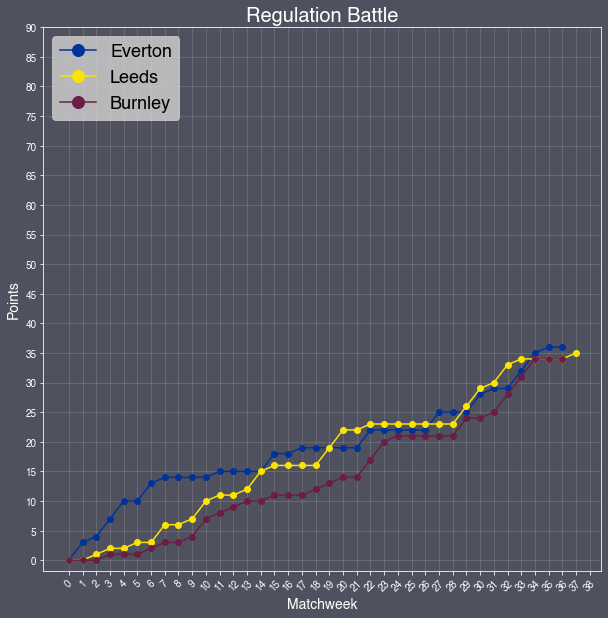

In [52]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor = '#50515e')

#Plot Regulation battle teams
plt.plot(cum_points_table.index, cum_points_table['Everton'], color='#003399', marker='o')
plt.plot(cum_points_table.index, cum_points_table['Leeds United'], color='#fbe304', marker='o')
plt.plot(cum_points_table.index, cum_points_table['Burnley'], color='#6C1D45', marker='o')

#yticks every 5 points
plt.yticks(range(0, 92, 5), range(0, 92, 5))
#Adjust the xticks to show each week, rotate values
plt.xticks(range(0, 39), range(0, 39), rotation = 45)

#Legend
plt.gca().legend(('Everton', "Leeds", "Burnley"), fontsize=18, markerscale = 2, facecolor = 'lightgrey', loc = 'upper left')

#Titles, labels
plt.title('Regulation Battle', fontsize=20, color = 'white')
plt.xlabel('Matchweek', fontsize=14, color = 'white')
plt.ylabel('Points', fontsize=14, color = 'white')
plt.grid(True, alpha = .3)
#plt.savefig('regulation_battle.jpg')